# ANOVA  
## Comparação de Médias - Teste F - ANOVA

### Volume Expiratório Forçado (FEV) (Pagano e Gauvreau, 2004, p.256)

Deseja-se comparar o volume expiratório forçado de pacientes com doença coronária oriundos de três centros médicos diferentes:   

• 21 pacientes da Johns Hopkins University School of Medicine  
• 16 pacientes do Rancho Los Amigos Medical Center  
• 23 pacientes da St. Louis University School of Medicine  
  
Ou seja, **deseja-se testar a *hipótese H0 : u1 = u2 = u3* contra a alternativa de que *pelo menos duas médias populacionais são diferentes***.

___

## Leitura dos Dados

In [1]:
#Instalando biblioteca researchpy
pip install researchpy

SyntaxError: invalid syntax (<ipython-input-1-98af09f8672f>, line 2)

In [3]:
#Biblioteca Researchpy (análises/informações univariadas e bivariadas)
import researchpy as rp

#Biblioteca Pandas (manipulação e análise de dados)
import pandas as pd 

In [4]:
#Banco de dados
df = pd.read_csv('http://www.est.ufmg.br/~enricoc/pdf/avancados_medicina/dados_aula2.txt', sep=' ') 

In [5]:
#Leitura das 5 primeiras linhas
df.head() 

,volume,grupo
0,3.23,1
1,3.47,1
2,1.86,1
3,2.47,1
4,3.01,1


In [6]:
#Informações df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  60 non-null     float64
 1   grupo   60 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [7]:
#Dados faltantes
df.isnull().sum()

volume    0
grupo     0
dtype: int64

In [8]:
#Recodificando variável grupo
df['grupo'].replace({1: 'John Hopkins', 2: 'Rancho Los Amigos', 3: 'St Louis'}, inplace= True) 

In [9]:
#Leitura das 5 primeiras linhas
df.head() 

,volume,grupo
0,3.23,John Hopkins
1,3.47,John Hopkins
2,1.86,John Hopkins
3,2.47,John Hopkins
4,3.01,John Hopkins


In [10]:
#Informações df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  60 non-null     float64
 1   grupo   60 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


## Análise Descritiva

In [11]:
round(rp.summary_cont(df['volume']), 2)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,volume,60.0,2.83,0.52,0.07,2.7,2.97


In [12]:
df.describe().round(2)

,volume
count,60.00
mean,2.83
std,0.52
min,1.69
25%,2.52
50%,2.83
75%,3.22
max,4.06


In [13]:
round(rp.summary_cont(df['volume'].groupby(df['grupo'])), 2)

,N,Mean,SD,SE,95% Conf.,Interval
grupo,,,,,,
John Hopkins,21,2.63,0.50,0.11,2.40,2.85
Rancho Los Amigos,16,3.03,0.52,0.13,2.75,3.31
St Louis,23,2.88,0.50,0.10,2.66,3.09


## Análise de Variância

In [14]:
#scipy.stats (Módulo de funções estatísticas)
import scipy.stats as stats

In [15]:
stats.f_oneway(df['volume'][df['grupo'] == 'John Hopkins'],
               df['volume'][df['grupo'] == 'Rancho Los Amigos'],
               df['volume'][df['grupo'] == 'St Louis'])

F_onewayResult(statistic=3.11533584739652, pvalue=0.05199854842234129)

In [16]:
#statsmodels.api (Módulo que fornece classes e funções para a estimativa de modelos estatísticos)
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Tabela ANOVA
model = ols('volume ~ C(grupo)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

#Nota: C (grupo) = entre as amostras e residuos = dentro das amostras

,sum_sq,df,F,PR(>F)
C(grupo),1.582837,2.0,3.115336,0.051999
Residual,14.480256,57.0,NaN,NaN


In [17]:
#A função abaixo foi criada para os resultados da tabela ANOVA unilateral retornados para a soma dos quadrados do Tipo II
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(grupo),1.582837,2.0,0.791419,3.115336,0.051999,0.098539,0.065867
Residual,14.480256,57.0,0.254040,NaN,NaN,NaN,NaN


### Interpretação
O objetivo deste estudo foi testar a diferença do volume expiratório forçado de pacientes com doença coronária entre os três centros médicos (Johns Hopkins University School of Medicine, Rancho Los Amigos Medical Center e St. Louis University School of Medicine).  
O volume médio geral foi de 2,8 IC95% (2,7; 2,9) com médias de grupo de 2,6 IC95% (2,4; 2,9) para o grupo de John Hopkins; 3,0 IC95% (2,7; 3,3) para o grupo de Rancho Los Amigos; e 2,9 IC95% (2,7; 3,1) para o grupo de St Louis.  
Há uma diferença estatisticamente significativa entre os grupos e seus volumes ao **nivel de 10% de significância**, F = 3,12, valor de p = 0,0512, efeito geral= 0,07.  
Para saber quais grupos diferiram significativamente, testes post-hoc precisam ser realizados. Antes de realizar esse trabalho, as premissas devem ser verificadas primeiro, caso seja necessário fazer alguma modificação no modelo.

## Verificação de Suposição

### INDEPENDÊNCIA
Esta suposição é testada quando o estudo é desenhado. O que isso significa é que todos os grupos são mutuamente exclusivos, ou seja, um indivíduo só pode pertencer a um grupo. Além disso, isso significa que os dados não são medidas repetidas (não são coletados ao longo do tempo). Neste exemplo, essa condição foi atendida.

### NORMALIDADE
A suposição de normalidade é testada nos resíduos do modelo ao vir de uma ANOVA ou estrutura de regressão. Um método para testar a suposição de normalidade é o teste de Shapiro-Wilk. Isso pode ser concluído usando o método shapiro() de scipy.stats. Infelizmente, a saída não é rotulada, mas é (estatística de teste W, valor p).

In [18]:
#Teste de Shapiro-Wilk
import scipy.stats as stats
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9928745031356812, pvalue=0.9795451164245605)

**O teste não é significativo, W = 0,99, p = 0,979, o que indica que os resíduos estão normalmente distribuídos.**

Outra forma de testar a suposição é por meio de uma verificação visual - isso é útil quando a amostra é grande. A razão disso ser verdade é que, à medida que o tamanho da amostra aumenta, a capacidade do teste estatístico de rejeitar a hipótese nula aumenta, ou seja, ele ganha poder para detectar diferenças menores à medida que o tamanho da amostra n aumenta.

Um método de verificar visualmente a distribuição é usar um gráfico de probabilidade com ou sem o valor de correlação, para avaliar a correlação dos valores observados com a distribuição teórica em questão - no caso atual seria a distribuição gaussiana (também conhecida como normal). Isso pode ser concluído usando o método probplot() de scipy.stats.

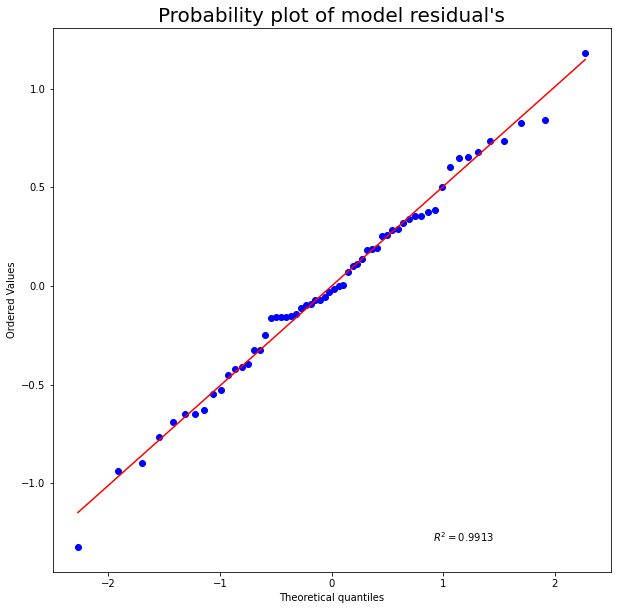

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot = plt, rvalue = True)
ax.set_title("Probability plot of model residual's", fontsize = 20)
ax.set

plt.show()

### HOMOGENEIDADE DE VARIÂNCIA
A suposição final é que todos os grupos têm variâncias iguais. Um método para testar essa suposição é o teste de Levene de homogeneidade de variâncias. Isso pode ser concluído usando o método levene() de scipy.stats.

In [20]:
#Teste de Levene
import scipy.stats as stats
stats.levene(df['volume'][df['grupo'] == 'John Hopkins'],
             df['volume'][df['grupo'] == 'Rancho Los Amigos'],
             df['volume'][df['grupo'] == 'St Louis'])

LeveneResult(statistic=0.04230923304574296, pvalue=0.9586033866653714)

**O teste de Levene de homogeneidade de variâncias não é significativo, o que indica que os grupos apresentam diferença não estatisticamente significativa em sua variância. Novamente, pode valer a pena verificar essa suposição visualmente também.**

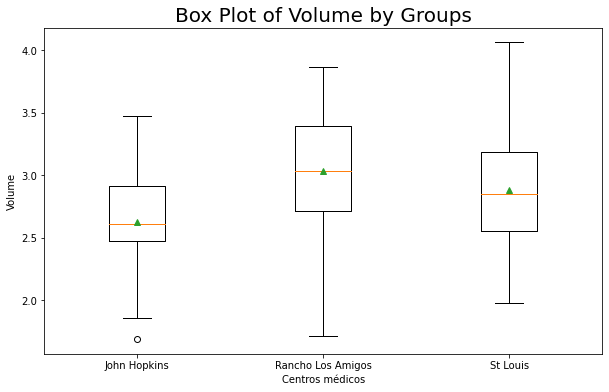

In [21]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Volume by Groups", fontsize = 20)
ax.set

data = (df['volume'][df['grupo'] == 'John Hopkins'],
        df['volume'][df['grupo'] == 'Rancho Los Amigos'],
        df['volume'][df['grupo'] == 'St Louis'])

ax.boxplot(data,
           labels= ['John Hopkins', 'Rancho Los Amigos', 'St Louis'],
           showmeans = True)

plt.xlabel("Centros médicos")
plt.ylabel("Volume")

plt.show()

O teste gráfico de homogeneidade de variâncias apóia os resultados do teste estatístico em que os grupos têm variâncias iguais.   

Por padrão, os gráficos de caixa mostram a mediana (linha laranja no gráfico acima). O triângulo verde é a média para cada grupo, que foi um argumento adicional que foi passado para o método.  

Existem diferentes maneiras de lidar com a heteroscedasticidade (variância desigual) e uma decisão precisa ser tomada. Algumas opções incluem, mas não estão limitadas a, transformar a variável dependente (resultado), podem usar médias aparadas, erros padrão robustos ou usar um teste paramétrico, como o teste t de Welch.  

## TESTE POST-HOC
Ao conduzir testes post-hoc ou comparações planejadas, permite-se ver quais grupos diferem significativamente entre si; lembre-se de que a ANOVA é um teste abrangente!  
Existem algumas abordagens diferentes que podem ser adotadas durante a realização desses testes, as que são implementadas em StatsModels atualmente são:  

• Diferença Honestamente Significativa de Tukey (HSD)  
• Bonferroni  
• Šidák (também conhecido como Dunn-Šidák)

### DIFERENÇA HONESTAMENTE SIGNIFICATIVA DE TUKEY (HSD)

In [22]:
#Teste de Tukey

#statsmodels.stats.multicomp (calcula as comparações de pares com intervalos de confiança TukeyHSD)
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['volume'], df['grupo'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
John Hopkins,Rancho Los Amigos,0.4063,0.0474,0.0038,0.8088,True
John Hopkins,St Louis,0.2525,0.2297,-0.1136,0.6186,False
Rancho Los Amigos,St Louis,-0.1538,0.6104,-0.5486,0.241,False


No topo, as informações de teste da tabela são fornecidas.  

**FWER** é a taxa de erro familiar, ou seja, o que está sendo definido e controlado nas  
colunas **grupo1** e **grupo2** que são os grupos sendo comparados  
**meandiff** é a diferença entre as médias do grupo  
**p-adj** é o valor p corrigido que leva em consideração as múltiplas comparações sendo conduzidas  
**lower** é a banda inferior do intervalo de confiança. No exemplo atual, o intervalo de confiança no nível de 90%, alfa = 0,10  
**upper** é a banda superior do intervalo de confiança. No exemplo atual, o intervalo de confiança no nível de 90%, alfa = 0,10  
**reject** é a regra de decisão com base no valor p corrigido  

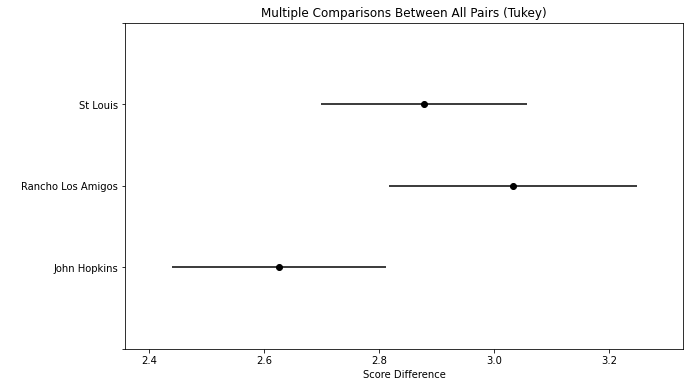

In [26]:
#É possível traçar a diferença usando este método também!
x = post_hoc_res.plot_simultaneous(ylabel = " ", xlabel = "Score Difference")

Usar Tukey HSD para testar as diferenças entre os grupos indica que há uma diferença estatisticamente significativa no escore do volume entre John Hopkins e Rancho Los Amigos; nenhum outro grupo diferiu significativamente.

### CORREÇÃO DE BONFERRONI
O método retorna 3 objetos, um é um objeto de tabela completo, o segundo são os dados da tabela e o terceiro são os dados da tabela com os títulos da tabela - não é entendido por que os desenvolvedores do StatsModels fizeram isso. Tudo o que é necessário é o primeiro objeto.  

A documentação mostra que é necessário fornecer a este método um método de teste estatístico, que pode ser uma função definida pelo usuário ou uma função de outra biblioteca Python - neste caso, serão realizados testes t de amostra independentes. Também é necessário definir o método de correção a ser aplicado ao valor p para ajustar para as comparações múltiplas ocorrendo.  

*allpairtest(statistical_test_method, method = "correction_method")*

In [24]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['volume'], df['grupo'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
John Hopkins,Rancho Los Amigos,-2.4105,0.0213,0.064,False
John Hopkins,St Louis,-1.6834,0.0997,0.2992,False
Rancho Los Amigos,St Louis,0.9296,0.3586,1.0,False


No topo, as informações de teste da tabela são fornecidas  

**FWER** é a taxa de erro familiar, ou seja, o que está sendo definido e controlado em  
**method** é o método de correção que está sendo aplicado aos valores p  

Depois, há o valor p ajustado (ajustado ) para os métodos de correção Sidak e Bonferroni  
as colunas **grupo1** e **grupo2** são os grupos sendo comparados  
**stat** é o valor da estatística de teste; neste caso, seria a estatística t  
**pval** é o valor p não corrigido retornado do **"método_teste_estatístico"** fornecido  
**pval_corr** é o valor p corrigido que foi corrigido usando qualquer "método de correção" fornecido  
**reject** é a regra de decisão com base no valor p corrigido  

A realização de comparações usando a correção de Bonferroni indica que os únicos grupos que diferiram significativamente são aqueles de John Hopkins e Rancho Los Amigos.

### CORREÇÃO ŠIDÁK (TAMBÉM CONHECIDA COMO CORREÇÃO DUNN-ŠIDÁK)

In [25]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['volume'], df['grupo'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

group1,group2,stat,pval,pval_corr,reject
John Hopkins,Rancho Los Amigos,-2.4105,0.0213,0.0626,False
John Hopkins,St Louis,-1.6834,0.0997,0.2703,False
Rancho Los Amigos,St Louis,0.9296,0.3586,0.7361,False


No topo, as informações de teste da tabela são fornecidas  

**FWER** é a taxa de erro familiar, ou seja, o que está sendo definido e controlado em  
**method** é o método de correção que está sendo aplicado aos valores p  

Depois, há o valor p ajustado (ajustado ) para os métodos de correção Sidak e Bonferroni  
as colunas **grupo1** e **grupo2** são os grupos sendo comparados  
**stat** é o valor da estatística de teste; neste caso, seria a estatística t  
**pval** é o valor p não corrigido retornado do **"método_teste_estatístico"** fornecido  
**pval_corr** é o valor p corrigido que foi corrigido usando qualquer "método de correção" fornecido  
**reject** é a regra de decisão com base no valor p corrigido  

A realização de comparações usando a correção de Šidák indica que os únicos grupos que diferiram significativamente são aqueles de John Hopkins e Rancho Los Amigos.

___

## REFERÊNCIAS  

https://www.pythonfordatascience.org/anova-python/  
Kutner, M. H., Nachtsheim, C. J., Neter, J., and Li, W. (2004). Applied linear statistical models (5th). New York, NY: McGraw-Hill Irwin.  
Rosner, B. (2015). Fundamentals of Biostatistics (8th). Boston, MA: Cengage Learning.  
Ott, R. L., and Longnecker, M. (2010). An introduction to statistical methods and data analysis. Belmon, CA: Brooks/Cole.  